In [ ]:
import pandas as pd

In [ ]:
x=pd.read_csv("/content/index (2).csv")

In [ ]:
df=pd.DataFrame(x)

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [ ]:
#checking null values
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


There is 89 null values in the column card

In [ ]:
df.dropna(inplace=True)

Dropping null values better than filling them especially in time series or sales prediction tasks because Filling missing values with the mean, median, or zero can skew trends, especially if the data is time-dependent. and here filling the card number with any other number will lead to the wrong information.

In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#splitting datetime column
df['Date']=pd.to_datetime(df['datetime']).dt.date
df['Time']=pd.to_datetime(df['datetime']).dt.time

datetime column is splitted for date and time columns to format the data

In [ ]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,Date,Time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03-01,10:15:50.520000
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12:19:22.539000
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03-01,12:20:18.089000
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03-01,13:46:33.006000
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03-01,13:48:14.626000


In [ ]:
#droping datetime,Date
df.drop(['datetime','Date'],axis=1,inplace=True)

In [ ]:
#formatting time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f', errors='coerce').dt.time

In [ ]:
df.head()

,date,cash_type,card,money,coffee_name,Time
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000


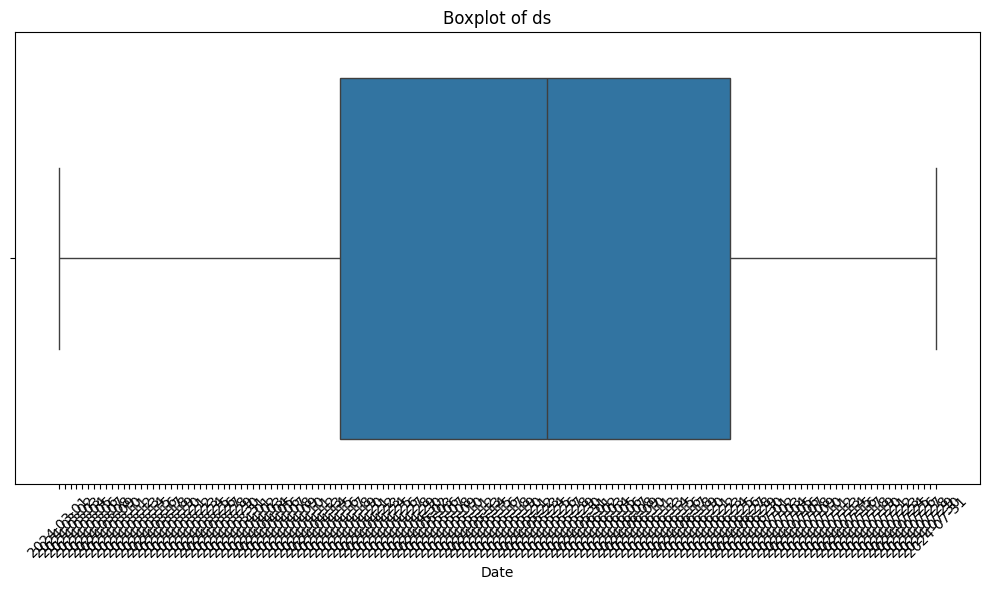

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['date'])
plt.title('Boxplot of ds')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Here dates are not visible becuse of too many dates and there is no outliers here

<Axes: ylabel='money'>

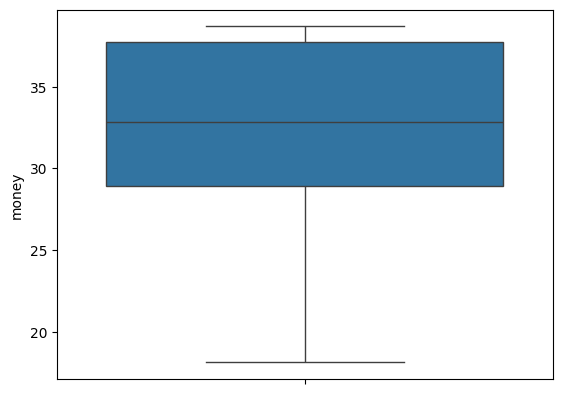

In [ ]:
sns.boxplot(df['money'])

There is no outliers in the data

In [ ]:
# Rename columns for Prophet compatibility
df = df.rename(columns={'date': 'ds', 'money': 'y'})

In [ ]:
df2=df.head(500)

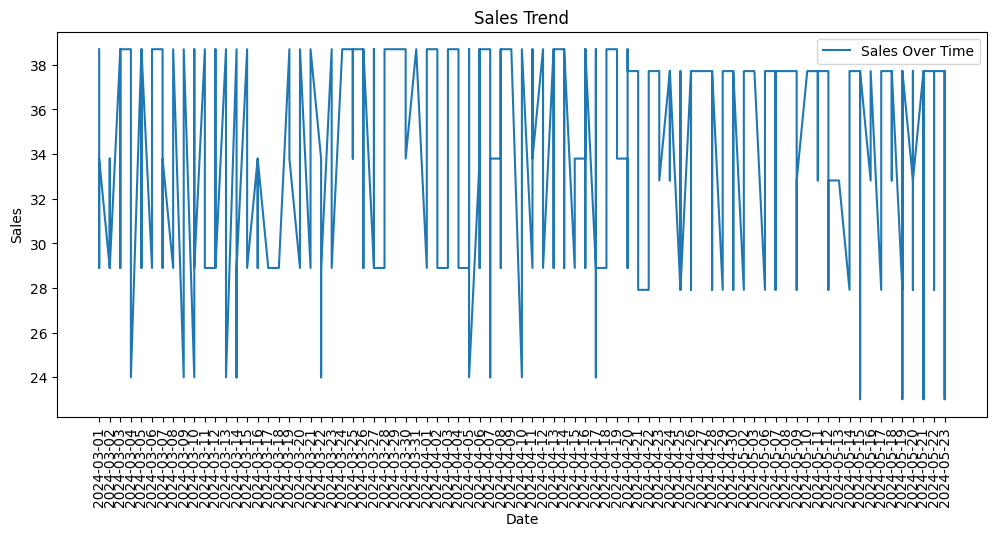

In [ ]:
#Visualize Sales Trends
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df2['ds'], df2['y'], label='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The sales trend shows frequent ups and downs between 24 and 39 units.
There is no clear increasing or decreasing trend over time.
Daily sales are inconsistent, indicating fluctuating customer activity.

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Forecasting using Prophet (next day/week/month)
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnv6oxxti/o4gjtw6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnv6oxxti/29d1znc0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97717', 'data', 'file=/tmp/tmpnv6oxxti/o4gjtw6q.json', 'init=/tmp/tmpnv6oxxti/29d1znc0.json', 'output', 'file=/tmp/tmpnv6oxxti/prophet_model4i2yvud0/prophet_model-20250720085632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:56:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:56:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe for forecasting (e.g., for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Make the forecast
forecast = model.predict(future)

In [ ]:
# Show next day/week/month forecast
print("\nForecasted sales:")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))


Forecasted sales:


,ds,yhat,yhat_lower,yhat_upper
0,2024-03-01,33.622723,27.816842,39.405886
1,2024-03-02,34.369095,28.483117,40.181950
2,2024-03-03,33.812382,28.105278,39.584851
3,2024-03-04,33.540969,27.844625,39.229838
4,2024-03-05,33.912513,28.151391,39.380483
5,2024-03-06,33.502053,27.831613,38.957553
6,2024-03-07,33.602855,27.708606,39.684703
7,2024-03-08,33.648425,27.837283,39.223707
8,2024-03-09,34.394797,28.600676,40.161001
9,2024-03-10,33.838084,28.176630,39.540970


These are the forecasted daily sales values generated by Prophet. Here's what each column means:

Column	Meaning
ds	- The date for which the prediction is made.

yhat-	The predicted sales amount for that day (expected/average value).

yhat_lower -	The lower bound of the prediction (95% confidence interval).

yhat_upper-	The upper bound of the prediction (95% confidence interval).

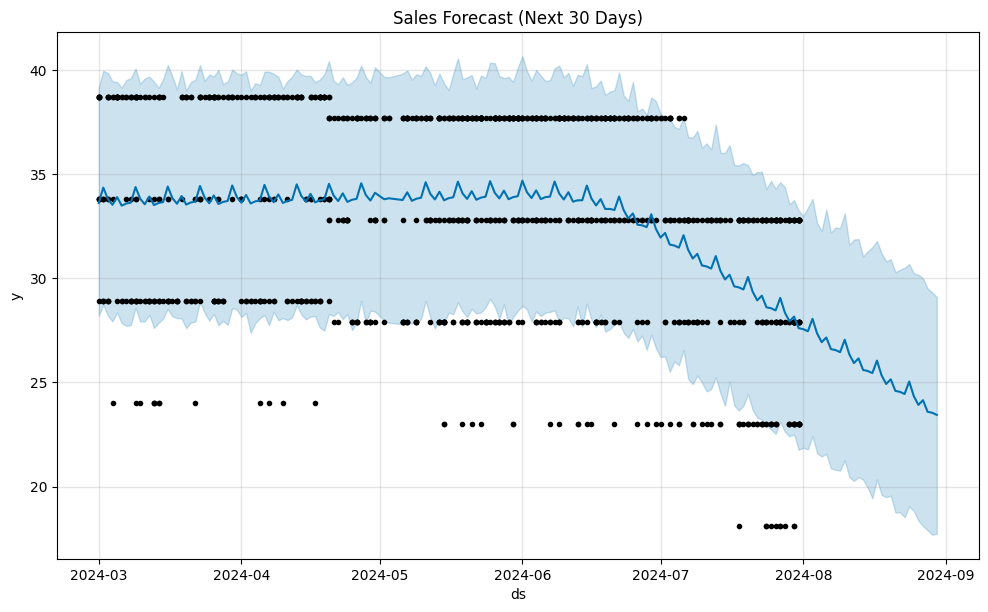

In [ ]:
# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast (Next 30 Days)")
plt.show()


Sales are slowly going down from mid-July.The blue line shows the expected sales trend for the next 30 days. The shaded area means the predictions could go a bit higher or lower.

In [ ]:
# ----- 1. Forecast Next Week (7 days) -----
future_week = model.make_future_dataframe(periods=7)
forecast_week = model.predict(future_week)


In [ ]:
# Display forecasted values for next 7 days
print("Next Week Forecast:")
display(forecast_week[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))

Next Week Forecast:


,ds,yhat,yhat_lower,yhat_upper
150,2024-08-01,27.563772,21.796681,33.361430
151,2024-08-02,27.462105,21.726863,33.327784
152,2024-08-03,28.061239,22.311800,33.164769
153,2024-08-04,27.357288,21.468871,32.813953
154,2024-08-05,26.938637,21.272924,32.767001
155,2024-08-06,27.162943,21.099122,32.714380
156,2024-08-07,26.605245,20.238889,32.202015


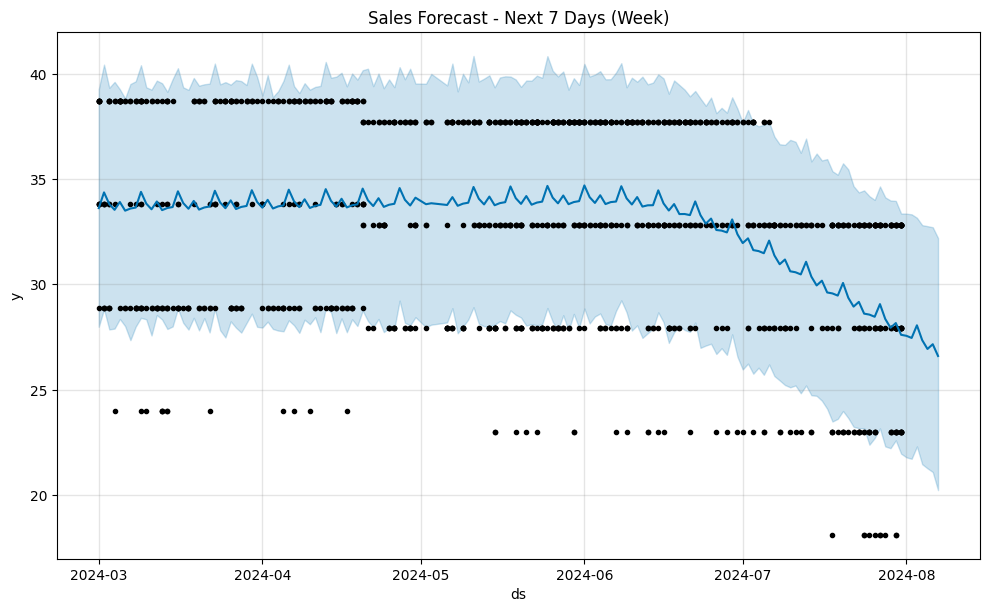

In [ ]:
# Plot next week forecast
model.plot(forecast_week)
plt.title("Sales Forecast - Next 7 Days (Week)")
plt.show()

Sales are expected to gradually decrease over the next 7 days.
Predicted values mostly range between 27 and 33 units per day.
The shaded area shows possible ups and downs in the forecast.

In [ ]:
# Specific Customer Purchase Analysis
# Total purchase per customer
customer_sales = df.groupby('card')['y'].sum().sort_values(ascending=False).reset_index()

In [ ]:
# Top 5 customers
top_customers = customer_sales.head()
print("Top 5 Customers:\n", top_customers)

Top 5 Customers:
                   card        y
0  ANON-0000-0000-0012  2593.18
1  ANON-0000-0000-0009  2212.70
2  ANON-0000-0000-0097   882.22
3  ANON-0000-0000-0040   706.36
4  ANON-0000-0000-0003   651.96


In [ ]:
# Plot purchases over time for top customer
top_card = top_customers.iloc[0]['card']
top_df = df[df['card'] == top_card]
top_df = top_df.groupby('ds')['y'].sum().reset_index()

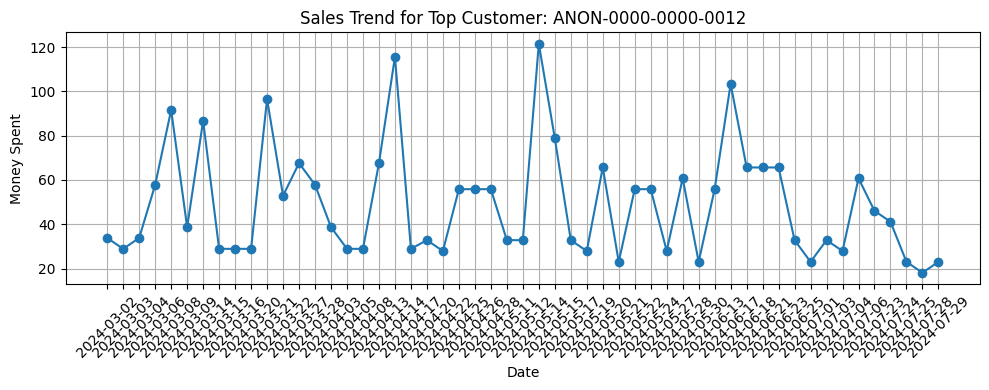

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(top_df['ds'], top_df['y'], marker='o')
plt.title(f"Sales Trend for Top Customer: {top_card}")
plt.xlabel("Date")
plt.ylabel("Money Spent")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The customer ANON-0000-0000-0012 shows frequent and consistent purchasing behavior with several high-spending spikes, indicating strong engagement. Their daily spending varies, with peaks crossing 100 units on certain days and moderate spending on most others. This pattern suggests loyalty and responsiveness to specific triggers like promotions or preferences.